Eniac's strategy concerning discounts

# Load data

Load Eniac data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
#plt.savefig() save plot

In [2]:
# define pandas display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [3]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [4]:
o_df = orders_qu.copy()
ol_df = orderlines_qu.copy()
p_df = products_cl.copy()
b_df = brands.copy()

In [5]:
p_df.shape

(9992, 6)

In [6]:
ol_p_df = ol_df.merge(p_df, how='inner', on = 'sku')
#ol_p_df.head(3)

In [7]:
ol_p_df['discount'] = ol_p_df['price'] - ol_p_df['unit_price']
ol_p_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81


In [8]:
ol_p_df['discount_%'] = ol_p_df['discount'] / ol_p_df['price'] * 100
ol_p_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,discount_%
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,22.13
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,17.25
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,18.89


# Business questions

1. How should products be classified into different categories to simplify reports and analysis?


2. What is the distribution of product prices across different categories?


3. How many products are being discounted?

4. How big are the offered discounts as a percentage of the product prices?

5. How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [9]:
# 3. How many products are being discounted?
ol_p_df = ol_p_df.drop(columns=['id', 'product_id', 'type'])
ol_p_df.head(3)

,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,discount,discount_%
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,13.50,22.13
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,3.96,17.25
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,16.81,18.89


In [10]:
filtered_df = ol_p_df[ol_p_df['discount'] > 0]
sku_discount_count = filtered_df['sku'].nunique()
sku_discount_count #4906

4906

In [11]:
ol_p_df.shape

(53231, 11)

In [12]:
# 4. How big are the offered discounts as a percentage of the product prices?
# already calculated as a column (discount_%)

In [13]:
### only keep discount products --> delete no discount and price increased products
#(ol_p_df['discount_%'] < 0).sum() # 1571 orders have negative discount_%
ol_p_df = ol_p_df[ol_p_df['discount_%'] > 0].copy()
ol_p_df.head(3) # now 0 neg values

,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,discount,discount_%
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,13.50,22.13
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,3.96,17.25
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,16.81,18.89


In [14]:
# 5.How do seasonality and special dates (Christmas, Black Friday) affect sales?
#ol_p_df.head(3)
#ol_p_df.columns

#ol_p_df['sales'] = ol_p_df['product_quantity'] * ol_p_df['price']
ol_p_df['sales_after_discount'] = ol_p_df['product_quantity'] * ol_p_df['unit_price']

ol_p_df['date'] = pd.to_datetime(ol_p_df['date'])
ol_p_df.info()
ol_p_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 49404 entries, 0 to 53230
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_order              49404 non-null  int64         
 1   product_quantity      49404 non-null  int64         
 2   sku                   49404 non-null  object        
 3   unit_price            49404 non-null  float64       
 4   date                  49404 non-null  datetime64[ns]
 5   name                  49404 non-null  object        
 6   desc                  49404 non-null  object        
 7   price                 49404 non-null  float64       
 8   in_stock              49404 non-null  int64         
 9   discount              49404 non-null  float64       
 10  discount_%            49404 non-null  float64       
 11  sales_after_discount  49404 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 5.9+ MB


,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,discount,discount_%,sales_after_discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,13.50,22.13,47.49
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,3.96,17.25,18.99
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,16.81,18.89,72.19


In [15]:
daily_sales = ol_p_df.groupby(ol_p_df['date'].dt.date)['sales_after_discount'].sum().reset_index()
daily_sales.columns = ['date', 'daily_sales']
daily_sales.head(3)

,date,daily_sales
0,2017-01-01,12529.25
1,2017-01-02,31956.26
2,2017-01-03,27327.25


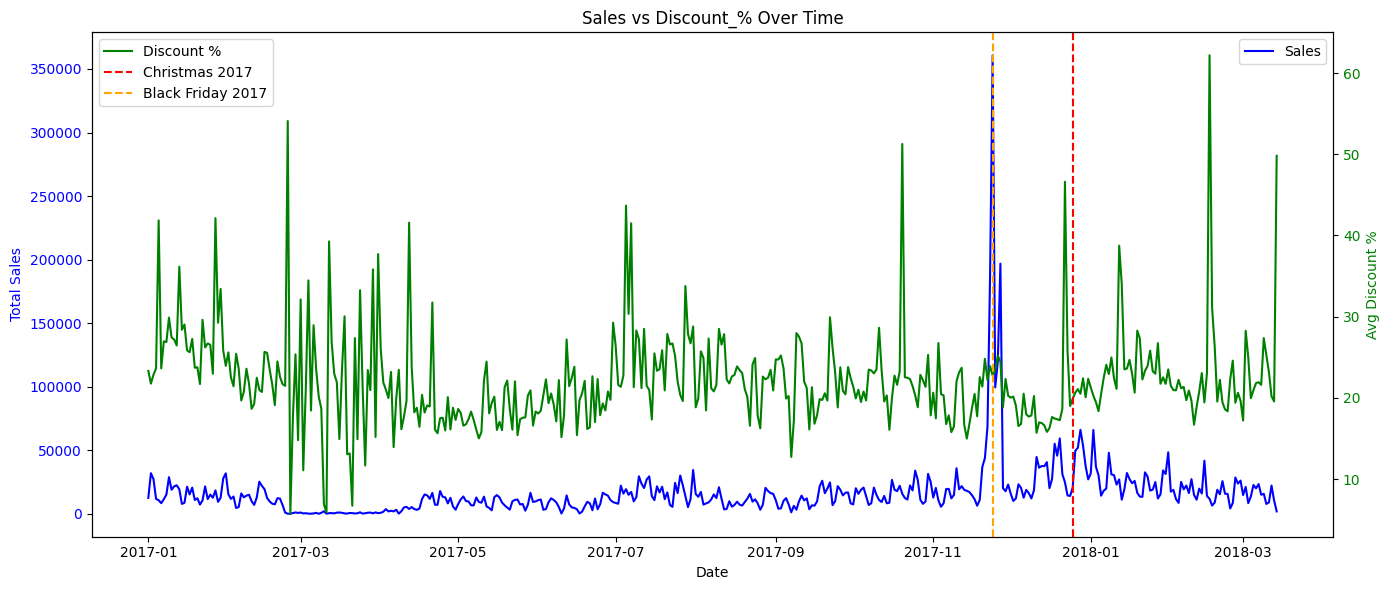

In [16]:
# daily basis
daily_df = ol_p_df.groupby(ol_p_df['date'].dt.date).agg({
    'sales_after_discount': 'sum',
    'discount_%': 'mean'
}).reset_index()
daily_df.columns = ['date', 'daily_sales', 'avg_discount_%']

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# First y-axis: Sales
sns.lineplot(data=daily_df, x='date', y='daily_sales', ax=ax1, color='blue', label='Sales')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#ax1.set_ylim(0, 100000)

# Second y-axis: Discount %
ax2 = ax1.twinx()
sns.lineplot(data=daily_df, x='date', y='avg_discount_%', ax=ax2, color='green', label='Discount %')
ax2.set_ylabel('Avg Discount %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Formatting
plt.title('Sales vs Discount_% Over Time')
ax1.set_xlabel('Date')
fig.tight_layout()
# Highlight Christmas (Dec 25 for each year)
plt.axvline(pd.to_datetime('2017-12-25'), color='red', linestyle='--', label='Christmas 2017')

# Highlight Black Friday (Friday after the 4th Thursday of November)
plt.axvline(pd.to_datetime('2017-11-24'), color='orange', linestyle='--', label='Black Friday 2017')
plt.legend()
plt.show();

In [17]:
daily_df.head(3)

,date,daily_sales,avg_discount_%
0,2017-01-01,12529.25,23.32
1,2017-01-02,31956.26,21.75
2,2017-01-03,27327.25,22.84


In [18]:
from scipy.stats import pearsonr

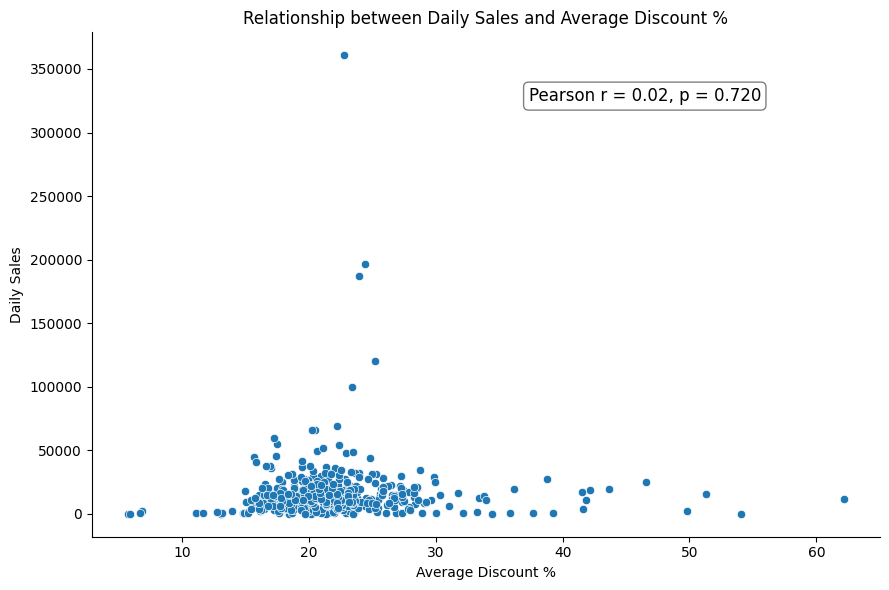

In [19]:
# Calculate correlation
r, p = pearsonr(daily_df['avg_discount_%'], daily_df['daily_sales'])

# Plot
sns.relplot(
    data=daily_df,
    x='avg_discount_%',
    y='daily_sales',
    kind='scatter',
    height=6,
    aspect=1.5,
    palette='bright'
)

plt.title('Relationship between Daily Sales and Average Discount %')
plt.xlabel('Average Discount %')
plt.ylabel('Daily Sales')

# Add correlation text on plot
plt.text(
    x=daily_df['avg_discount_%'].max() * 0.6,  # adjust position as needed
    y=daily_df['daily_sales'].max() * 0.9,
    s=f'Pearson r = {r:.2f}, p = {p:.3f}',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
)

plt.tight_layout()
plt.show()

In [20]:
# look at total quantity sold vs discount_% over time
ol_p_df.head(3)

,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,discount,discount_%,sales_after_discount
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,13.50,22.13,47.49
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,3.96,17.25,18.99
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,16.81,18.89,72.19


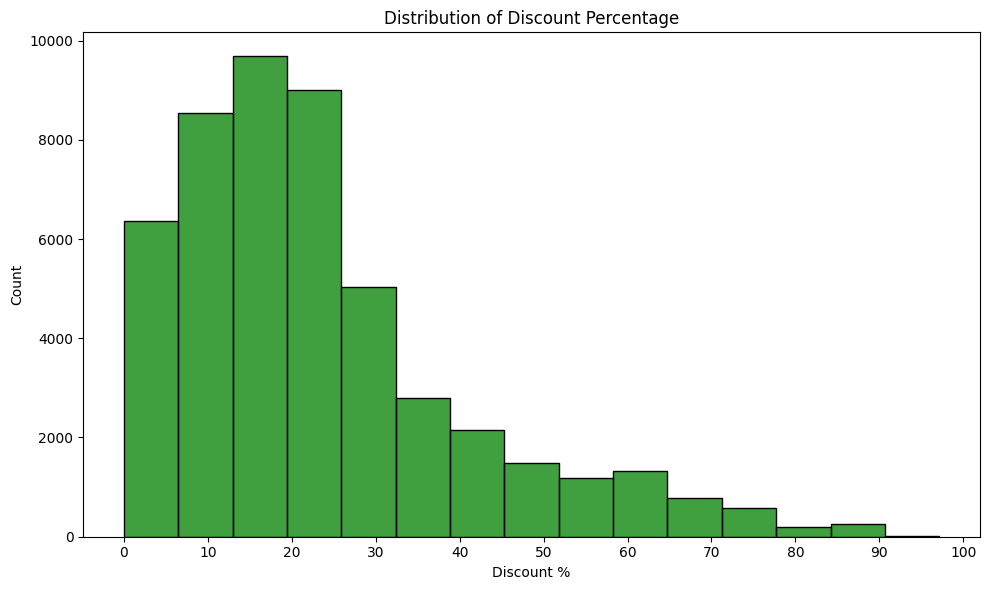

In [21]:
plt.figure(figsize=(10, 6))
#sns.histplot(data=ol_p_df, x='discount_%', bins=50, kde=True, color='green')
sns.histplot(data=ol_p_df, x='discount_%', bins=15, color='green')

plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount %')
plt.ylabel('Count')
plt.xticks(ticks=range(0, 101, 10))
plt.tight_layout()
plt.show()